In [2]:
# Developer docs
# https://www.tensorflow.org/tutorials/keras/classification
# https://www.tensorflow.org/api_docs/python/tf/keras/Model

# Importing modules
from os import listdir, system
import pandas as pd
import numpy as np
import sys
import time
import pandas as pd

import cv2 as cv2
import imutils
import imageio
import pickle
from IPython.display import clear_output, display, HTML


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import tensorflow as tf
from skimage.io import imread
from skimage import measure
from skimage.measure import regionprops
from skimage.transform import resize
from scipy import ndimage


# Downloading dataset from: http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/
# You can comment this after running once.

### CHARS74K DATASET FOR TRAINING
# !wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz
# !tar -xvzf ./EnglishImg.tgz && rm -rf EnglishImg.tgz
# !git clone https://github.com/captcha-breakers/D-training-segmentation.git

# CAPTCHA DATA: DOWNLOAD ANYONE & APPROPRIATELY CONFIGURE THE PATH
# !git clone https://github.com/captcha-breakers/dataset-simple-uppercase.git
# !git clone https://github.com/rdmpage/solving-captchas-code-examples.git
# !git clone https://github.com/captcha-breakers/dataset-pycaptcha-uppercase.git
# !git clone https://github.com/captcha-breakers/D-captchas-simple-salt-n-pepper.git

In [3]:
# Setting up folders
base_dir = "./D-training-segmentation/data/"
folders = listdir(base_dir)
folders.sort()
folders = folders[:36]
print(folders)

# Setting image_size
image_size = (20, 20)

['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036']


In [5]:
# Collecting images from folders
data = []
total_images = 0
for i in folders:
    all_images = listdir(base_dir+i)[:100]
    total_images+=len(all_images)
    currentlabel = int(i[6:])-1

    for name in all_images:
        image = cv2.imread(base_dir+i+"/"+name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, image_size)

        # Filtering
        # image = cv2.GaussianBlur(image,(5,5),0)
        # image = cv2.Laplacian(image,cv2.CV_64F)
        # image = cv2.GaussianBlur(image,(5,5),0)
        # kernel = np.ones((3, 3), np.uint8)
        # image = cv2.filter2D(image,-1,kernel)
        
        data.append((image/255, currentlabel))
    
    if int(i[6:])<=10:
      print("Images for", currentlabel,":",  len(all_images))
    else:
      print("Images for", chr(65-11+currentlabel+1),":",  len(all_images))
print("Total images: ", total_images)

Images for 0 : 100
Images for 1 : 100
Images for 2 : 100
Images for 3 : 100
Images for 4 : 100
Images for 5 : 100
Images for 6 : 100
Images for 7 : 100
Images for 8 : 100
Images for 9 : 100
Images for A : 100
Images for B : 100
Images for C : 100
Images for D : 100
Images for E : 100
Images for F : 100
Images for G : 100
Images for H : 100
Images for I : 100
Images for J : 100
Images for K : 100
Images for L : 100
Images for M : 100
Images for N : 100
Images for O : 100
Images for P : 100
Images for Q : 100
Images for R : 100
Images for S : 100
Images for T : 100
Images for U : 100
Images for V : 100
Images for W : 100
Images for X : 100
Images for Y : 100
Images for Z : 100
Total images:  3600


In [6]:
# Shuffling data & making train/test
np.random.shuffle(data)
n = len(data)
p = int(80*n/100)

train_images = []
train_labels = []
test_images = []
test_labels = []
for i in range(n):
    if i<p:
        train_images.append(data[i][0])
        train_labels.append(data[i][1])
    else:
        test_images.append(data[i][0])
        test_labels.append(data[i][1])

20
2
14
21
23
1
15
13
20
27


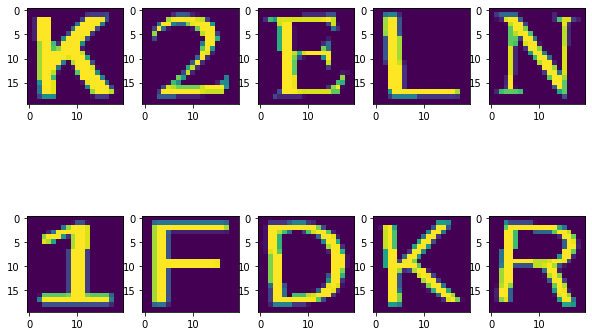

In [7]:
# Visualizing Training data
fig = plt.figure(figsize=(10, 7))

for i in range(10):
  fig.add_subplot(2, 5, i+1)
  print(data[i][1])
  imshow(data[i][0])
plt.show()

In [22]:
# Making the model and training it
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=image_size),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(36)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(
    np.array(train_images), 
    np.array(train_labels), 
    epochs=10,
    batch_size=100
)

Epoch 1/10
29/29 [==============================] - 1s 9ms/step - loss: 2.2042 - accuracy: 0.5528
Epoch 2/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0665 - accuracy: 0.9889
Epoch 3/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0196 - accuracy: 0.9957
Epoch 4/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.9992
Epoch 5/10
29/29 [==============================] - 0s 11ms/step - loss: 0.0110 - accuracy: 0.9972
Epoch 6/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 0.9999
Epoch 7/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.9979
Epoch 8/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.9981
Epoch 9/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 10/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9998


In [23]:
# system("mkdir -p models")
# model.save('./models/my_model_84.h5')

# Predicting on test images
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(np.array(test_images))

p=0
for i in range(len(test_images)):
  if np.argmax(predictions[i]) == test_labels[i]:
    p+=1

print("Test accuracy: ", 100*p/len(test_images))

Test accuracy:  99.72222222222223


In [24]:
fil_dir = "./D-captchas-simple-salt-n-pepper/data/"
total = 0
char_p = 0
char_n = 0
cap_p = 0
cap_n = 0

for fil in listdir(fil_dir)[:100]:
  image = cv2.imread(fil_dir + fil)
  # imshow(image), plt.show()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

  cnts, new = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] 
  captcha = np.invert(thresh)
  labelled_captcha = measure.label(captcha)

  character_dimensions = (
      0.25*captcha.shape[0], 
      0.95*captcha.shape[0], 
      0.05*captcha.shape[1], 
      0.3*captcha.shape[1]
  )
  min_height, max_height, min_width, max_width = character_dimensions

  characters = []
  charactersx = []
  counter=0
  column_list = []
  row_list = []
  d = []
  for regions in regionprops(labelled_captcha):
      y0, x0, y1, x1 = regions.bbox
      region_height = y1 - y0
      region_width = x1 - x0

      if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
          roi = captcha[y0:y1, x0:x1]
          resized_char = cv2.copyMakeBorder(roi, 10, 10, 10, 10, cv2.BORDER_CONSTANT)
          resized_char = resize(roi, image_size)
          column_list.append(x0)
          d.append([x0, resized_char])
  d = sorted(d)
  predicted_captcha = ""  
  ind=0
  for _,each_character in d:
      x_p,y_p = 3,3
      each_character = cv2.copyMakeBorder(each_character, x_p, x_p, y_p, y_p, cv2.BORDER_CONSTANT)
      each_character = cv2.resize(each_character,image_size)
      
      # imshow(each_character), plt.show()
      each_character = each_character.reshape(1, -1)
    
      result, = probability_model.predict([each_character])
      r = np.argmax(result)
      
      if r<10:
        # print(chr(48+r))
        predicted_captcha+=chr(48+r)
        if fil[ind] == chr(48+r):char_p += 1
        else:char_n += 1
      else:
        # print(chr(55+r))
        predicted_captcha+=chr(65-10+r)
        if fil[ind] == chr(65-10+r):char_p += 1
        else:char_n += 1
      ind += 1
  
  if predicted_captcha == fil[:6]: cap_p+=1
  else:cap_n+=1

  # Statistics
  stats = pd.DataFrame(
    [
        [char_p, char_n, 100*char_p/(char_p+char_n)], 
        [cap_p, cap_n, 100*cap_p/(cap_p+cap_n)]
    ], 
    index=["Char", "Captcha"],
    columns=["Pos", "Neg", "Acc"]
  )
  total+=1
  clear_output(wait=True)
  display(HTML(stats.to_html()))
  print("Current file: ", total)
  print(fil[:6], ":", predicted_captcha)

,Pos,Neg,Acc
Char,481,96,83.362218
Captcha,46,54,46.000000


Current file:  100
FLXPCM : FLXPCM
